# Project 2
Garren Ramirez,
06/19/2022,
DAT 301

### Motivation 

For this project I decided to look at popular music statistics and its qualites. I chose to use the the "Top Hits Spotfy from 2000-2019" from Kaggle.com ( https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019 ). I chose this dataset because I love music, I thoroughly enjoy listening to a variety of music genres and exploring music from other countries as well, so I feel trying to find the qualities of what makes a 'hit' could be an interesting project. I will be conducting a statistical analysis trying to find correlations between a tracks popularity and influences from other variables. The dataset is decribed as such from Kaggle, 'This dataset contains audio statistics of the top 2000 tracks on Spotify from 2000-2019. The data contains about 18 columns each describing the track and it's qualities.' 
First and foremost, we need to import the necessary libraries needed for this project, numpy, matplotlib, pandas, and seaborn are all of the necessary libraries I have imported. 

In [1]:
#imported libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#naming dataframe, showing first 5 values
music_df = pd.read_csv("songs_normalize.csv")
music_df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [3]:
#displaying last 5 values
music_df.tail()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop
1999,Post Malone,Circles,215280,False,2019,85,0.695,0.762,0,-3.497,1,0.0395,0.1920,0.002440,0.0863,0.553,120.042,hip hop


Above is a small sample output of the dataframe, I named my data frame "music_df and I output the first and last 5 rows. The data is roughly ordered from oldest to most recent songs based on year released. One thing to note is that in the .head() output, we actually have songs that were released in 1999, my guess is that they were released on the edge of 1999 so they were grouped in with songs from 2000. 
For sake of quality and consistency, I am going to remove anything that does not fall in the 2000-2019 year range. Just to be sure, I will check the unique years present in the data frame in the next cell.
Looking at our variables, we have the standard self explanatory ones, such as artist and year, however there are others that could use some context. 

**Popularity-** "The higher the value the more popular the song is."

**Danceability-**  "Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable."

**Energy-**  "Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity."

**Key-**  "The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1."

**Loudness-**  "The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db."

**Mode-**  "Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0."

**Speechiness-**  "Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks."

**Acousticness-**  "A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic."

**Instrumentalness-**  "Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0."

**Valence-**  "A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)."

**Liveness-**  "Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live."

**Tempo-**  "The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration."

##### Reference

Koverha, Mark. “Top Hits Spotify from 2000-2019.” Kaggle, Kaggle.com, 31 May 2022, https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019.

*All descriptions above were taken directly from the Kaggle webpage for this dataset. Credit to Mark Koverha*

### Cleaning

In [4]:
#displaying all years within the dataframe
years = music_df.year.unique()
years.sort()
years

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020])

In [5]:
#grouping years before 2000 and after 2019, then dropping them after
dropYear1 = music_df[(music_df['year'] < 2000)].index 
dropYear2 = music_df[(music_df['year'] > 2019)].index

music_df = music_df.drop(dropYear1)
music_df = music_df.drop(dropYear2)

#dropping na values, and displaying first 5 records
music_df.dropna()
music_df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
6,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.0302,0.000000,0.0454,0.760,104.504,hip hop
7,Robbie Williams,Rock DJ,258560,False,2000,68,0.708,0.772,7,-4.264,1,0.0322,0.0267,0.000000,0.4670,0.861,103.035,"pop, rock"


In [6]:
#rechecking the years contained after dropping ones not in 2000-2019 year range.
years = music_df.year.unique()
years.sort()
years

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

Above, in our first cell of the group, I found the unique years in the dataset, we actually had 1998, 1999, and 2020 values within the set, so I simply removed them by extracting values that are lower than 2000 and higher than 2019 to variables, and then dropped them from the 'music_df'. 
In our last cell from the group above, I simply checked to see if our method to drop years outside of 2000-2019 worked, and based on the output, it is clear to see that it did. I also used '.dropna()' just in case there are any NA values within the dataframe that we cannot see. 

Below, I actually found later while creating outputs, that the data set had a strange value in the genre column. It had 'set()' as a category and I believe this to be an error by the creator of the dataset. So I simply went back to here and followed the same process as above, but with '==set()' this time, and removed the values with it from the dataset.

In [21]:
#grouping records that have 'set()' as a genre, then dropping them
genre = music_df[(music_df['genre'] == 'set()')].index
music_df = music_df.drop(genre)

In the following cell, I decided to create a function that returns the length of the song in minutes and seconds, and then added it to the the data frame. It is not truly numerical, but I think that it is easier to read than milliseconds. But for any calculations or measurement, 'duration_ms' will have to be used.

In [8]:
#function to change milliseconds to minutes:seconds
def to_min(ms):
    
    secondsDeci=ms/1000
    
    minutes = int(secondsDeci//60)
    seconds = int(secondsDeci%60)
    seconds = str(seconds)
    
    if len(seconds) == 1:
        seconds = '0' +seconds 

    return f'{minutes}:{seconds}'

#applying function above to 'duration_ms' and then creating a new column that contains minutes and seconds
music_df['duration_mins'] = music_df['duration_ms'].apply(to_min)

#display 5 values to see new column
music_df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,duration_mins
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,3:31
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal",3:44
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop,3:20
6,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.0302,0.000000,0.0454,0.760,104.504,hip hop,4:44
7,Robbie Williams,Rock DJ,258560,False,2000,68,0.708,0.772,7,-4.264,1,0.0322,0.0267,0.000000,0.4670,0.861,103.035,"pop, rock",4:18


In the cell below, I had to return back to my cleaning phase once again, because when I was trying to find the top rated songs and display them, I saw that there were actually repeat entries, something that I had not expected. So, I simply used the 'drop_duplicates' function on the 'song' column which did the trick. Later in this exploration, I show the most popular songs, so I will not display them here

In [9]:
#getting rid of duplicate entries, filtering by song since the list is based off of top songs. 
music_df = music_df.drop_duplicates(subset="song")

### Basic analysis

In [10]:
#displaying a table with some basic calculations using .describe()
#used .T to transpose the table
music_df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration_ms,1819.0,228322.816932,39093.005355,113000.000000,203499.50000,223066.0000,247133.000000,484146.000
year,1819.0,2009.624519,5.739703,2000.000000,2005.00000,2010.0000,2015.000000,2019.000
popularity,1819.0,59.470588,21.763217,0.000000,56.00000,65.0000,73.000000,89.000
danceability,1819.0,0.667239,0.140941,0.129000,0.58100,0.6760,0.765000,0.975
energy,1819.0,0.722607,0.152268,0.054900,0.62550,0.7390,0.840500,0.999
key,1819.0,5.384277,3.611830,0.000000,2.00000,6.0000,8.000000,11.000
loudness,1819.0,-5.501156,1.945194,-20.514000,-6.47650,-5.2730,-4.164000,-0.276
mode,1819.0,0.554700,0.497136,0.000000,0.00000,1.0000,1.000000,1.000
speechiness,1819.0,0.105263,0.097158,0.023900,0.04005,0.0615,0.132000,0.576
acousticness,1819.0,0.127608,0.172942,0.000019,0.01355,0.0548,0.176000,0.976


In [11]:
# finding min, max, and mean in minutes and seconds.
meanLength = music_df['duration_ms'].mean()
minLength = music_df['duration_ms'].min()
maxLength = music_df['duration_ms'].max()

#printing min, max, mean utilizing defined function above. 
print(f'Average top hit duration in minutes and seconds: {to_min(meanLength)}')
print(f'Duration of smallest song length {to_min(minLength)}')
print(f'Duration of largest song length {to_min(maxLength)}')

Average top hit duration in minutes and seconds: 3:48
Duration of smallest song length 1:53
Duration of largest song length 8:04


I wanted to get some basic numbers for our variables within the dataframe. So I used '.describe()' in order to get a basic table that gives us the mean, standard deviation, min, percentiles, and max values. I used '.T' to transpose the table, becuase it did not read as easily when count, mean, etc. were on the y axis. I also printed out the mean of 'duration_ms' in minutes and seconds because I feel it is easier to read. 

Some interesting things to note here, our tempo (BPM) is averaging around 120, an example of this kind of tempo most people would know is Poker Face by Lady Gaga. Another interesting feature is our average popularity is only around 60. I would have expected this be around 70 or 80 considering these are all 'top hits', but I'm sure some top hits are more popular than others. Another feature is that our valence, which is described as mood of the song, is .55. This would techincally be a neutral mood, so I think this indicates we have a good mix of 'moods' in the top hits. 

In [12]:
#returning the counts of unique artists within the dataframe.
artist = music_df['artist'].value_counts()
artist

Rihanna              22
Drake                20
Calvin Harris        20
Eminem               19
David Guetta         18
                     ..
Oliver Heldens        1
Cher Lloyd            1
Waka Flocka Flame     1
The Strumbellas       1
Pixie Lott            1
Name: artist, Length: 786, dtype: int64

Above, I wanted to see basic distribution of our artists, so I used '.value_counts()' to group together the artists and return a simple table with the amount of times they appear and assigned it to 'artist'. I was a little surprised to see that there are only 786 unique artists with top hits in a list of about 2000 songs over a 20 year period. This indicates that a lot of artists had more than one hit, making this distribution a little unequal.

Below, I wanted to see what our top 20 artists are for this 20 year period. I must say that I am not surprised by the output of this, as a lot of these artists I hear on the radio quite frequently and they are very common names within popular american music. One thing to note is that all of these artists still have over 10 hits alone, relating back to the unequal distribution of artists and top hits. Most of the popular artists from the output below fall into the top genre categories presented later, which is also not surprsing. 

In [13]:
#displaying the artists with the most songs within the dataframe. 
artist.nlargest(20)

Rihanna              22
Drake                20
Calvin Harris        20
Eminem               19
David Guetta         18
Britney Spears       18
Katy Perry           16
Chris Brown          15
Beyoncé              15
Kanye West           15
P!nk                 14
Black Eyed Peas      14
Taylor Swift         13
Maroon 5             13
Ariana Grande        13
Bruno Mars           11
Justin Timberlake    11
Coldplay             11
Nelly                11
Usher                11
Name: artist, dtype: int64

In the cell below, I was actually curious what the most popular songs are within this data frame. I created a new dataframe, sorting by popularity rating, and then I displayed the top 10 songs. Interestingly, Eminem appears 3 times within the top 10 list, already taking up 30% of our 10 samples. 

In [14]:
#creating new dataframe, sorting songs by popularity, displaying top 10 songs
songs = music_df.sort_values('popularity', ascending = False)
songs[0:10]

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,duration_mins
1322,The Neighbourhood,Sweater Weather,240400,False,2013,89,0.612,0.807,10,-2.810,1,0.0336,0.04950,0.017700,0.1010,0.398,124.053,"rock, pop",4:00
1311,Tom Odell,Another Love,244360,True,2013,88,0.445,0.537,4,-8.532,0,0.0400,0.69500,0.000017,0.0944,0.131,122.769,pop,4:04
201,Eminem,Without Me,290320,True,2002,87,0.908,0.669,7,-2.827,1,0.0738,0.00286,0.000000,0.2370,0.662,112.238,hip hop,4:50
1613,WILLOW,Wait a Minute!,196520,False,2015,86,0.764,0.705,3,-5.279,0,0.0278,0.03710,0.000019,0.0943,0.672,101.003,"pop, R&B, Dance/Electronic",3:16
6,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.760,104.504,hip hop,4:44
1819,Billie Eilish,lovely (with Khalid),200185,False,2018,86,0.351,0.296,4,-10.109,0,0.0333,0.93400,0.000000,0.0950,0.120,115.284,"pop, Dance/Electronic",3:20
1227,Bruno Mars,Locked out of Heaven,233478,False,2012,85,0.726,0.698,5,-4.165,1,0.0431,0.04900,0.000000,0.3090,0.867,143.994,pop,3:53
1514,Avicii,The Nights,176658,False,2014,85,0.527,0.835,6,-5.298,1,0.0433,0.01660,0.000000,0.2490,0.654,125.983,"pop, Dance/Electronic",2:56
1512,The Neighbourhood,Daddy Issues,260173,False,2015,85,0.588,0.521,10,-9.461,1,0.0329,0.06780,0.149000,0.1230,0.337,85.012,"rock, pop",4:20
209,Eminem,'Till I Collapse,297786,True,2002,85,0.548,0.847,1,-3.237,1,0.1860,0.06220,0.000000,0.0816,0.100,171.447,hip hop,4:57


In the cell below, I wanted to see what the top genres were. Based off of our top artists, it is not hard to accept this output, as most of the top artists fall into these genres. Pop was by far the leader in our list, with hip hop, R&B, and Dance/Electronic following close behind. I plotted this list out after this cell for some visual comparison. 

In [15]:
genre = music_df['genre'].value_counts()
genre.nlargest(20)

pop                               386
hip hop, pop                      259
hip hop, pop, R&B                 225
pop, Dance/Electronic             206
pop, R&B                          161
hip hop                           115
hip hop, pop, Dance/Electronic     73
rock                               55
rock, pop                          36
Dance/Electronic                   36
rock, metal                        35
pop, rock                          26
pop, latin                         25
latin                              15
hip hop, Dance/Electronic          15
hip hop, pop, latin                14
R&B                                13
pop, rock, Dance/Electronic        12
pop, rock, metal                   12
country                             9
Name: genre, dtype: int64

### Visualization
Now that we have seen some basic numbers, lets get some visuals.

Below I plotted out the list of top genres in the data frame. As we know Pop, Hip Hop, R&B, and Dance/Electronic are the top genres by a longshot. Rock barely even comes close in comparison. I used a simple .plot graph to display these values against one another. 


<AxesSubplot:>

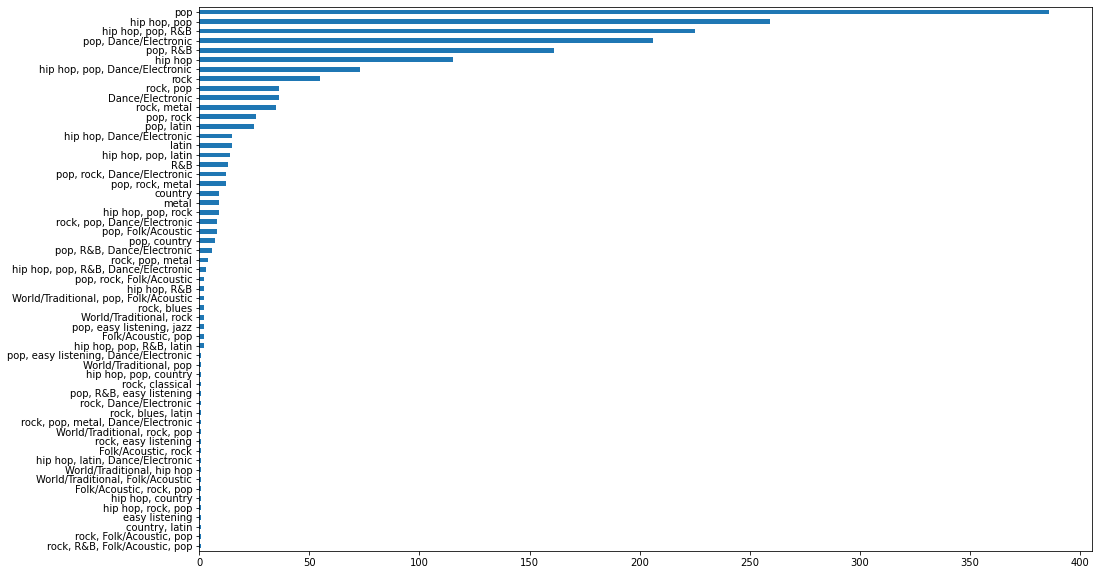

In [16]:
#define plot size
plt.figure(figsize = (16,10))

#using .value_counts() on our genre column to return the number of unique entries,
#sort them by ascending, and then plot them on a bar chart
sorted_genre = music_df['genre'].value_counts().sort_values(ascending = True).plot(kind = 'barh')
sorted_genre

In the next cell, I made a list of the average song length based on year. To my surprise, there was actually decent correlation between these two. (I made a heat map later of correlations between variables, which is why I decided to come back and visualize this, I thought it was quite interesting.) I think the reason for this could be an increase in streaming platforms. Most artists get money from streams on popular platforms, Spotify being one of them. Earning money on these platforms comes from full listens, so shorter songs with an increased amount on an album could warrant a better monetary gain. But this is complete speculation on my part and can not be inferred completely from this output. I have head this theory from others online, but once again, we cannot confirm that this theory is true from the information we have here.



In [17]:
#making new dataframe from 'duration_ms' and 'year', then grouping by year, 
#applying mean, and resting index
song_length = music_df[['duration_ms','year']].groupby('year').mean().reset_index()
song_length['minutes'] = song_length['duration_ms'].apply(to_min)
song_length['total_seconds'] = song_length['duration_ms']/100
song_length = song_length.drop(['duration_ms'],axis = 1)

song_length

,year,minutes,total_seconds
0,2000,4:10,2509.512817
1,2001,4:02,2428.715189
2,2002,4:13,2534.734167
3,2003,3:56,2367.429111
4,2004,3:53,2332.580000
5,2005,3:57,2372.730722
6,2006,3:59,2394.295556
7,2007,3:51,2316.606163
8,2008,3:53,2335.350787
9,2009,3:54,2342.343846


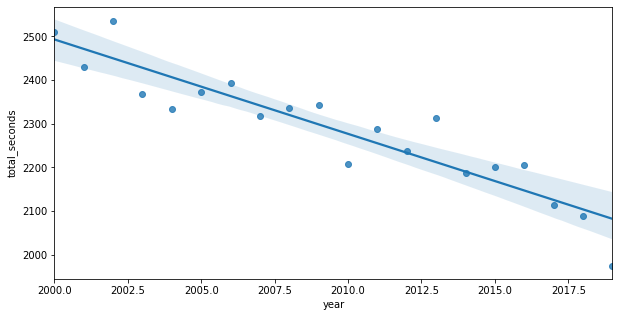

In [18]:
#defining figure size, then using regplot to create linear regression plot
plt.figure(figsize = (10,5))
lengthPlot = sns.regplot(x= 'year', y = 'total_seconds',  data = song_length)

As we can tell from our graph, the average length of top hit songs is slowly decreasing. I sadly could not figure out a way to properly get my minutes column attached to the side of the y-axis. Since it was a combo of string and int, most plotting functions didn't like it, so I decided to keep it in seconds. Regardless, I still wanted to visually convey the point that the average song length is decreasing as the years move forward.

Next, I thought it would be good to show some density plots in order to get a visual of what our top hit variables look like overall. I plotted 9 charts, each showing the density and KDE of a different numerical variable from our data frame.

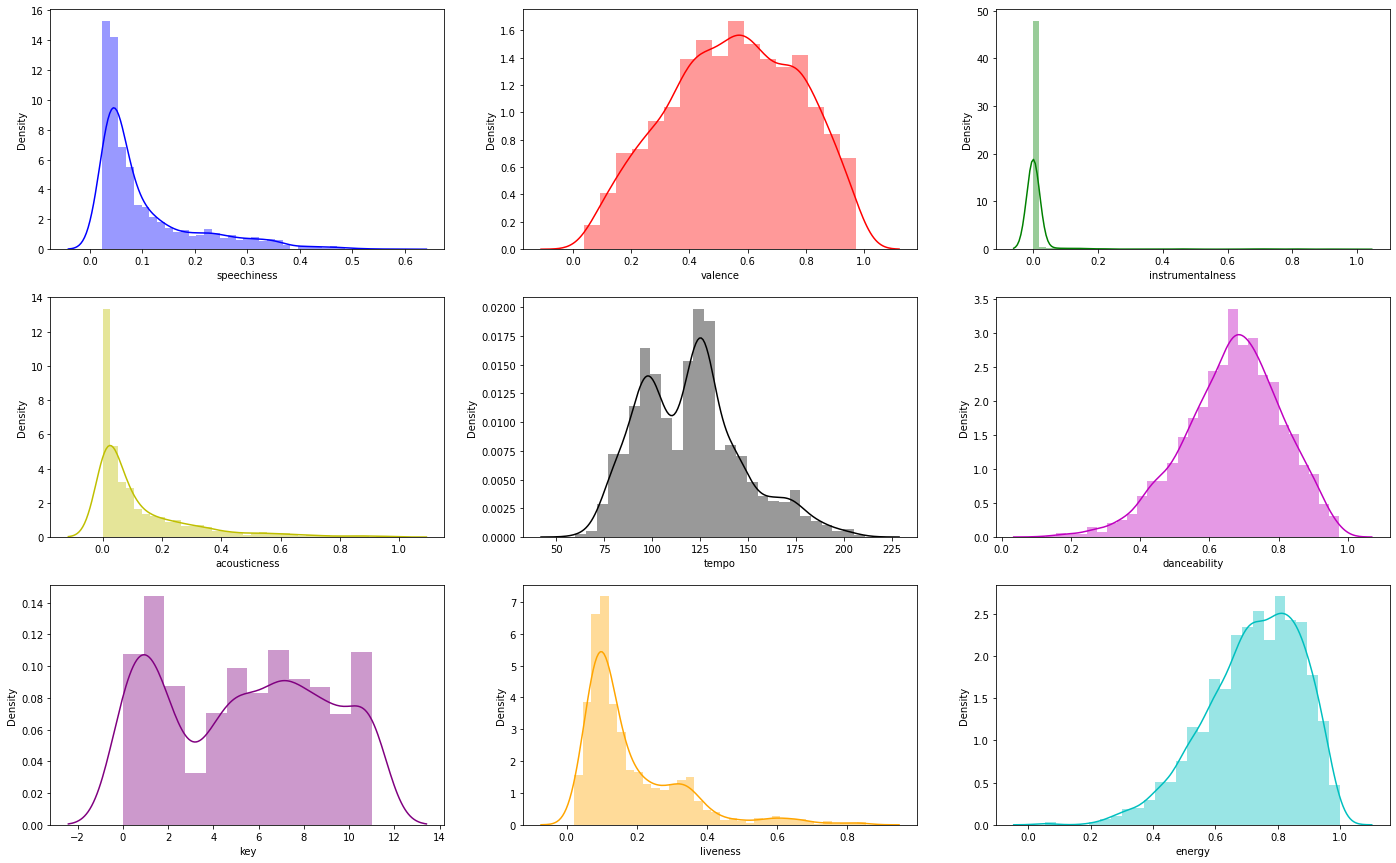

In [19]:
#using distplot brings up an error, this blocks it
import warnings
warnings.filterwarnings('ignore')

#defining plot matrix and overall size
fig, ax = plt.subplots(3,3, figsize=(24,15))

#creating 9 plots from music_df columns and plotting on the subplot using ax[][] for coordinates
sns.distplot(music_df['speechiness'],     color = "b", kde =True, ax = ax[0][0])
sns.distplot(music_df['valence'],         color = 'r', kde =True, ax = ax[0][1])
sns.distplot(music_df['instrumentalness'],color = 'g', kde =True, ax = ax[0][2])
sns.distplot(music_df['acousticness'],    color = "y", kde =True, ax = ax[1][0])
sns.distplot(music_df['tempo'],           color = 'k', kde =True, ax = ax[1][1])
sns.distplot(music_df['danceability'],    color = 'm', kde =True, ax = ax[1][2])
sns.distplot(music_df['key'],             color = 'purple', kde =True, ax = ax[2][0])
sns.distplot(music_df['liveness'],        color = 'orange', kde =True, ax = ax[2][1])
sns.distplot(music_df['energy'],          color = 'c', kde =True, ax = ax[2][2])

plt.show()

From the graphs, above we can see what makes a song a top hit. Speechiness, Instrumentalness, and Acousticness are all very low, which indicates that most of the songs from the data frame do not contain these features. Energy, Danceability and Valance were all measured very highly, showing that a top song is going have these kinds of features more frequently. Remember that Valance is measured from 0 being 'sad' and 1 being 'happy', so our top hits have a solid overall spread of 'mood' if you will. Our Tempo shows that most of the top hits are either around 125 or slightly below 100 BPM. I think this shows that Tempo and Energy go well together, one might think that this would hold true for danceability as well, but if we look below at the next plot, we will see Danceability and Tempo have a slightly negative correlation. 

<AxesSubplot:>

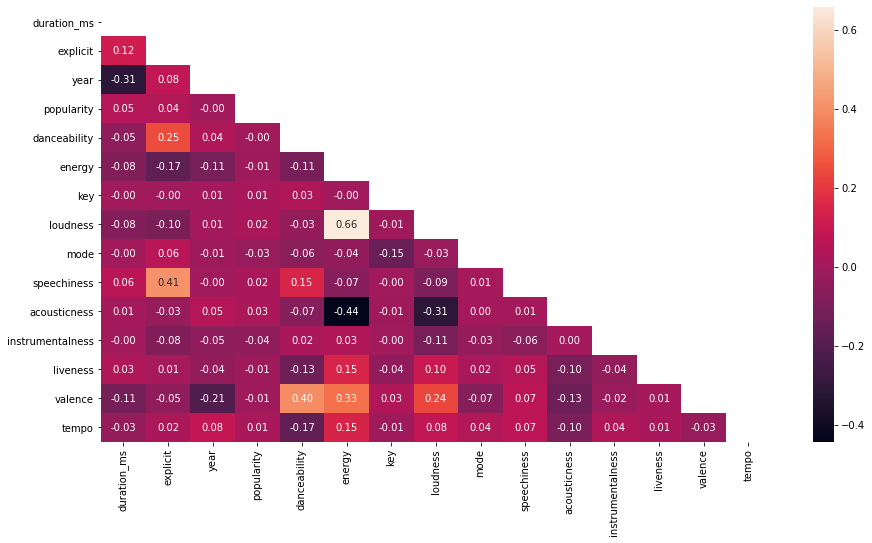

In [20]:
#getting correlations between numerical variables
corr = music_df.corr()
#using this variable to be the 'mask' of the heatmap plot
matrix = np.triu(corr)

#defining size, plotting our corr() function, masking upper half
#annot gives us the labels, and fmt makes the labels 2 decimals long. 
plt.figure(figsize=(15,8))
sns.heatmap(music_df.corr(), mask=matrix, annot = True, fmt = '.2f')

I first wanted to see if our popularity variable correlated with anything, however, since this list of data already has the most popular songs over the years, none of the attributes correlated to strongly with it. I decided to map out all of the variables, to show if any others were related in some way, since simply looking at strictly popularity yeilded little results for me. 

First we have year and duration, as we saw earlier, the length of songs are decreasing as time goes on, giving a negative correlation. Loudness and energy also have a strong correlation, this makes sense as a loud song will probably be more energentic, and vice versa. Danceability and valence have a positive correlation, meaning a more 'danceable' song will probably have a better mood to it. This also applies to our valence and energy correlation, as a more energitic song will likely have a higher mood to it. 

One observation that stood out to me was that speechiness had a slight positive correlation with excplicitness. This possibly might be from hip hop songs, as hip hop tends to have more spoken word and swearing in it, but we cannot assume this is the only reason why of course. 

Another interesting find is that, year and valence have a slightly negative correlation. Could this mean that top hit songs have gotten sadder over the years? We cannot assume this as a fact, but this correlation did surprise me a little. 

## Conclusion
Well, this concludes my paper, I believe I have explored what makes a top hit enough to probably go and make one myself. In total, we need:

**1. High danceability-** Good rythm, maybe a tempo of around 120 BPM, and good energy.

**2. Little to no "instruments"-** No guitars, drums, etc., use music software.

**3. Small amount of spoken words-** Keep it simple, straight to the point, maybe a good chorus and make the vocals "part of the song".

**4. Recorded in a studio-** This top hits list had little to no live performances in it. 

**5. Needs to be either neutral of happy sounding-** Upbeat in general most likely.

**6. Roughly 3-4 minutes long** The top hit average song length was 3:48.

**7. Genre should be Pop, Hip Hip, or EDM.**

Congratulations, now you can make your own top hit!

Overall, I am happy with how this project turned out. I had some slight hiccups and needed to go back and repeat things, but it gave me the oppourtunity to re-evaluate and properly clean and then present the data with what I believe to be little or no errors. I did enjoy exploring this data, I thought it was very cool to see what the general population likes to listen too and what attributes were associated with these popular songs. I would like to see how this data was collected or even how some of these variables were measured because the numbers that were in it did seem accurate in terms of what I would 'rate' them as, yet I don't whether to embrace and accept them as is. I will likely remain skeptical with the data, as it's never a bad thing to be skepitcal when it comes to science and analysis, especially when you don't know how the data was collected or measured. I'm sure there is someone else out there who could do a much better job of analyzing or even presenting/interpreting variables such as these. 
